# Covid-19 Tracker for Spain
https://cnecovid.isciii.es/covid19/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funcs import *
import plotly.express as px
import plotly.graph_objects as go

## Data Gathering & Cleaning

Read Dataset

In [2]:
data = get_data()
data.head()

,province,sex,age,date,cases,hospitalizations,icu,deaths
12720,A,H,0-9,2020-01-09,0,0,0,0
12721,A,H,10-19,2020-01-09,0,0,0,0
12722,A,H,20-29,2020-01-09,0,0,0,0
12723,A,H,30-39,2020-01-09,0,0,0,0
12724,A,H,40-49,2020-01-09,0,0,0,0


In [3]:
data = get_waves(get_sma7,data)
data.head()

,province,sex,age,date,cases,hospitalizations,icu,deaths,wave
12720,A,H,0-9,2020-01-09,0,0,0,0,1
12721,A,H,10-19,2020-01-09,0,0,0,0,1
12722,A,H,20-29,2020-01-09,0,0,0,0,1
12723,A,H,30-39,2020-01-09,0,0,0,0,1
12724,A,H,40-49,2020-01-09,0,0,0,0,1


In [4]:
data.tail()

,province,sex,age,date,cases,hospitalizations,icu,deaths,wave
1367395,ZA,NC,50-59,2022-05-09,0,0,0,0,6
1367396,ZA,NC,60-69,2022-05-09,0,0,0,0,6
1367397,ZA,NC,70-79,2022-05-09,0,0,0,0,6
1367398,ZA,NC,80+,2022-05-09,0,0,0,0,6
1367399,ZA,NC,NC,2022-05-09,0,0,0,0,6


Export to .csv

In [5]:
data.to_csv('../data/covid_19_spain.csv', sep=';', index = False)

# Time series visualization

In [2]:
data = pd.read_csv('../data/covid_19_spain.csv', sep = ';')

In [5]:
age_series = get_sma7_by_age(data)

In [7]:
fig = px.line(
    age_series, 
    x="date", 
    y="dailyCases", 
    color='age',
    template = 'simple_white',
    title = 'Daily Cases of Covid-19 by Age in Spain, 7-day Simple Moving Average')
fig.show()

In [48]:
totals_age_wave = data.groupby(['age', 'wave'], as_index = False).sum()
mask = totals_age_wave.age != 'NC'
totals_age_wave = totals_age_wave[mask]

In [59]:
heatmap_age_wave = pd.crosstab(totals_age_wave.wave, totals_age_wave.age, totals_age_wave.cases, aggfunc=sum, normalize = 'index')

In [60]:
heatmap_age_wave

age,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
wave,,,,,,,,,
1,0.004779,0.009138,0.058973,0.095124,0.145672,0.173623,0.140724,0.135998,0.235969
2,0.070637,0.115619,0.143450,0.144228,0.169260,0.144591,0.090378,0.057363,0.064476
3,0.075724,0.115321,0.127379,0.137122,0.170996,0.152691,0.098386,0.062470,0.059912
4,0.082618,0.139753,0.146822,0.146792,0.182313,0.146831,0.082184,0.047100,0.025587
5,0.076698,0.204392,0.244246,0.155893,0.120672,0.081218,0.056589,0.030143,0.030149
6,0.103436,0.124790,0.122777,0.157871,0.195274,0.127352,0.074079,0.050556,0.043865


In [72]:
totals_wave = totals_age_wave.groupby('wave', as_index=False).sum()

In [76]:
totals_wave / 1000

,wave,cases,hospitalizations,icu,deaths
0,1,248181,109501,9347,29482
1,2,1499507,111131,10494,21316
2,3,1469625,106670,11143,26015
3,4,558451,43481,5810,5540
4,5,1217689,45509,4924,6185
5,6,7082206,115382,8187,16407


Text(0.5, 1.0, 'Total Cases by Wave (Thousands)')

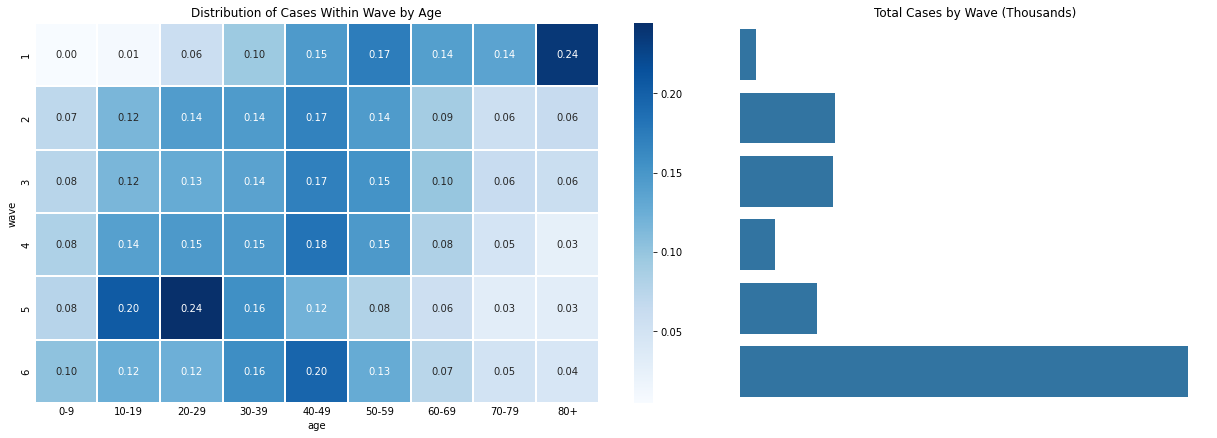

In [116]:
# figure and spacing
size_unit=np.array([1.7*1.77, 1])
fig, ax = plt.subplots(1, 2, figsize=7*size_unit, gridspec_kw={"width_ratios": (.6, .4)})
fig.subplots_adjust(wspace=0, hspace=0)
# heatmap
sns.heatmap(
    data = heatmap_age_wave, 
    annot=True, 
    linewidths=0.1, 
    cmap='Blues', 
    fmt='.2f', 
    ax = ax[0],
    )
# barplot
sns.barplot(
    data = totals_wave/1000, 
    x='cases', 
    y='wave', 
    orient = 'h', 
    color=sns.color_palette()[0], 
    ax=ax[1],
    )
# despine barplot
sns.despine(fig=fig, ax=ax[1], top=True, bottom=True, left=True, right=True)
# Axes styling
ax[0].tick_params(axis=u'both', which=u'both',length=0)
ax[1].tick_params(axis=u'both', which=u'both',length=0)
ax[1].set(
    ylabel=None,
    xlabel=None,
    yticklabels=[],
    xticklabels=[],
    xticks=[],
    )
# titles
ax[0].set_title('Distribution of Cases Within Wave by Age')
ax[1].set_title('Total Cases by Wave (Thousands)')

### Has the mortality remained constant over time?

### Has the ratio between ages remained constant over time?

----

## 3rd Dashboard. Cumulative Visualizations

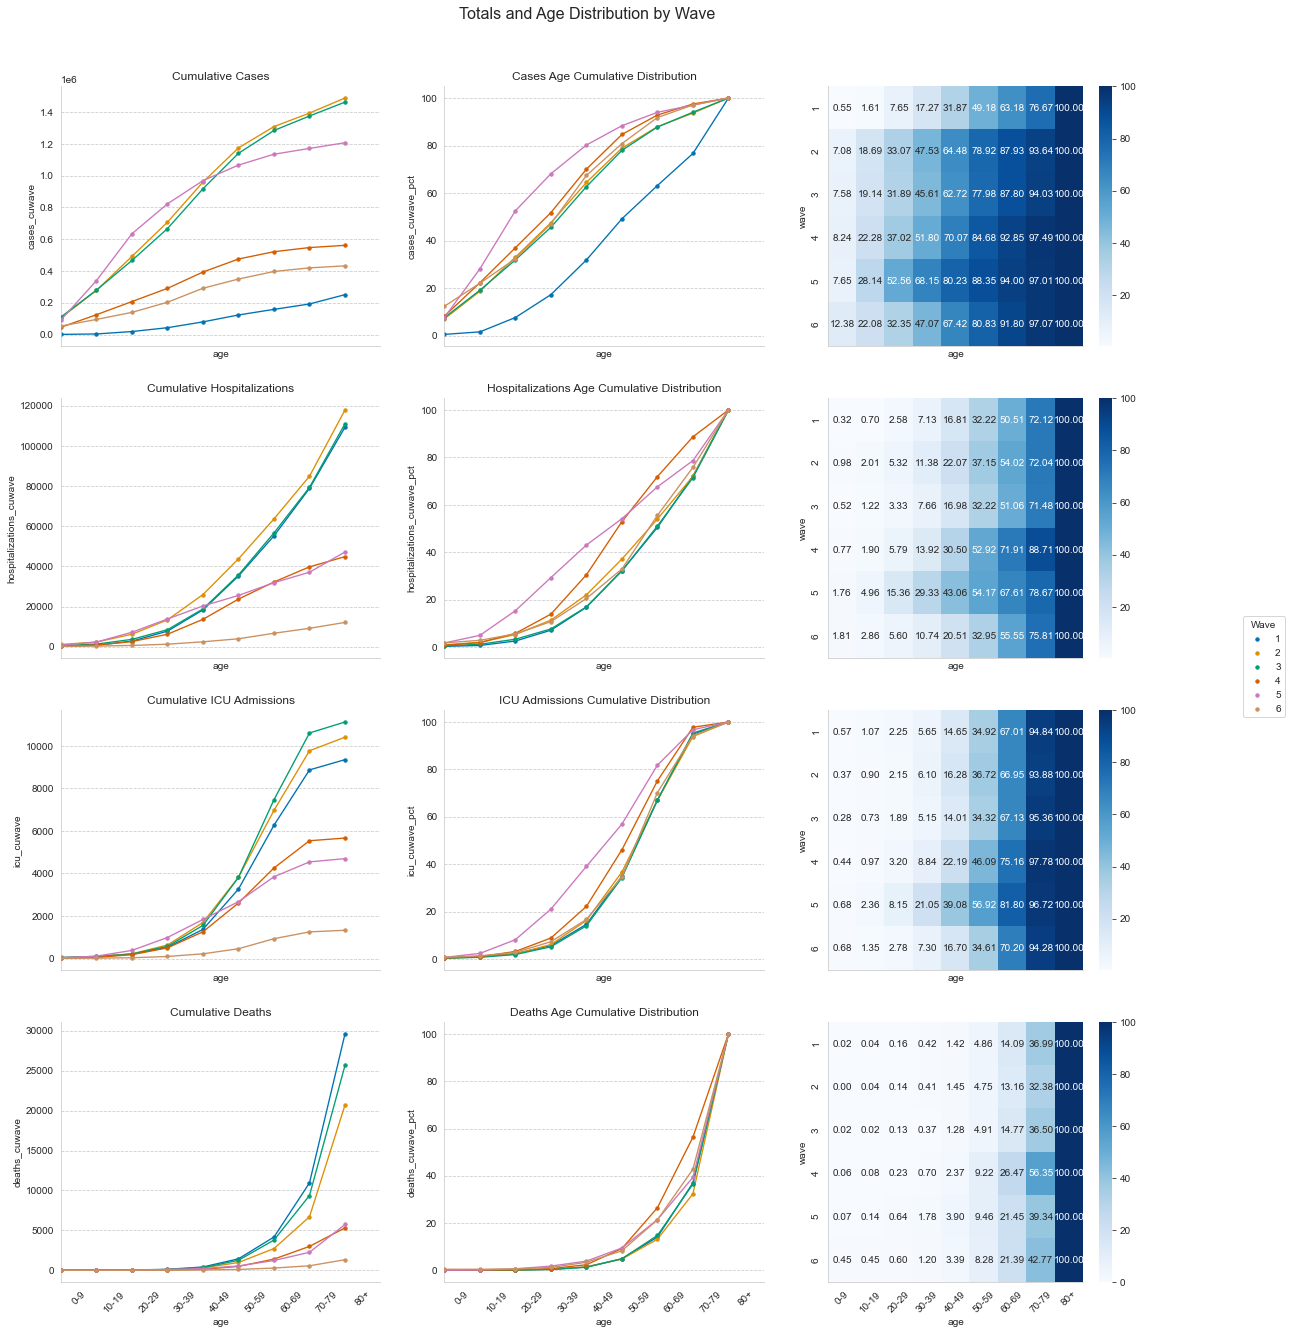

In [93]:
size_unit=np.array([1.77,2])
sns.set_palette('colorblind')

# create figure
fig, axes = plt.subplots(4, 3, figsize = 11*size_unit, sharex=True)
fig.suptitle('Totals and Age Distribution by Wave', y=0.93)

# plot axes and set titles
sns.pointplot(ax = axes[0,0], data=totals, x='age', y='cases_cuwave', hue = 'wave', scale = 0.5)
axes[0,0].set_title('Cumulative Cases')
sns.pointplot(ax = axes[0,1], data=totals, x='age', y='cases_cuwave_pct', hue = 'wave', scale = 0.5)
axes[0,1].set_title('Cases Age Cumulative Distribution')
sns.heatmap(ax = axes[0,2], data =totals.pivot('wave', 'age', 'cases_cuwave_pct'), cmap='Blues', annot=True, fmt=".2f")


sns.pointplot(ax = axes[1,0], data=totals, x='age', y='hospitalizations_cuwave', hue = 'wave', scale = 0.5)
axes[1,0].set_title('Cumulative Hospitalizations')
sns.pointplot(ax = axes[1,1], data=totals, x='age', y='hospitalizations_cuwave_pct', hue = 'wave', scale = 0.5)
axes[1,1].set_title('Hospitalizations Age Cumulative Distribution')
sns.heatmap(ax = axes[1,2], data =totals.pivot('wave', 'age', 'hospitalizations_cuwave_pct'), cmap='Blues', annot=True, fmt=".2f")

sns.pointplot(ax = axes[2,0], data=totals, x='age', y='icu_cuwave', hue = 'wave', scale = 0.5)
axes[2,0].set_title('Cumulative ICU Admissions')
sns.pointplot(ax = axes[2,1], data=totals, x='age', y='icu_cuwave_pct', hue = 'wave', scale = 0.5)
axes[2,1].set_title('ICU Admissions Cumulative Distribution')
sns.heatmap(ax = axes[2,2], data =totals.pivot('wave', 'age', 'icu_cuwave_pct'), cmap='Blues', annot=True, fmt=".2f")

sns.pointplot(ax = axes[3,0], data=totals, x='age', y='deaths_cuwave', hue = 'wave', scale = 0.5)
axes[3,0].set_title('Cumulative Deaths')
sns.pointplot(ax = axes[3,1], data=totals, x='age', y='deaths_cuwave_pct', hue = 'wave', scale = 0.5)
axes[3,1].set_title('Deaths Age Cumulative Distribution')
sns.heatmap(ax = axes[3,2], data =totals.pivot('wave', 'age', 'deaths_cuwave_pct'), cmap='Blues', annot=True, fmt=".2f")


# All axes styling
for ax in axes.flat:
    # rotate x_ticks 
    ax.tick_params(axis='x', rotation=45)

for ax in axes[:, :2].flat:
    ax.get_legend().remove()

#styling
sns.despine()
legend_handles, legend_labels = axes[1,1].get_legend_handles_labels()
fig.legend(legend_handles, legend_labels, loc='center right', title = 'Wave')

plt.savefig('./fig/totals_cumulative.png', bbox_inches = 'tight')

## 4th Dashboard Heatmaps

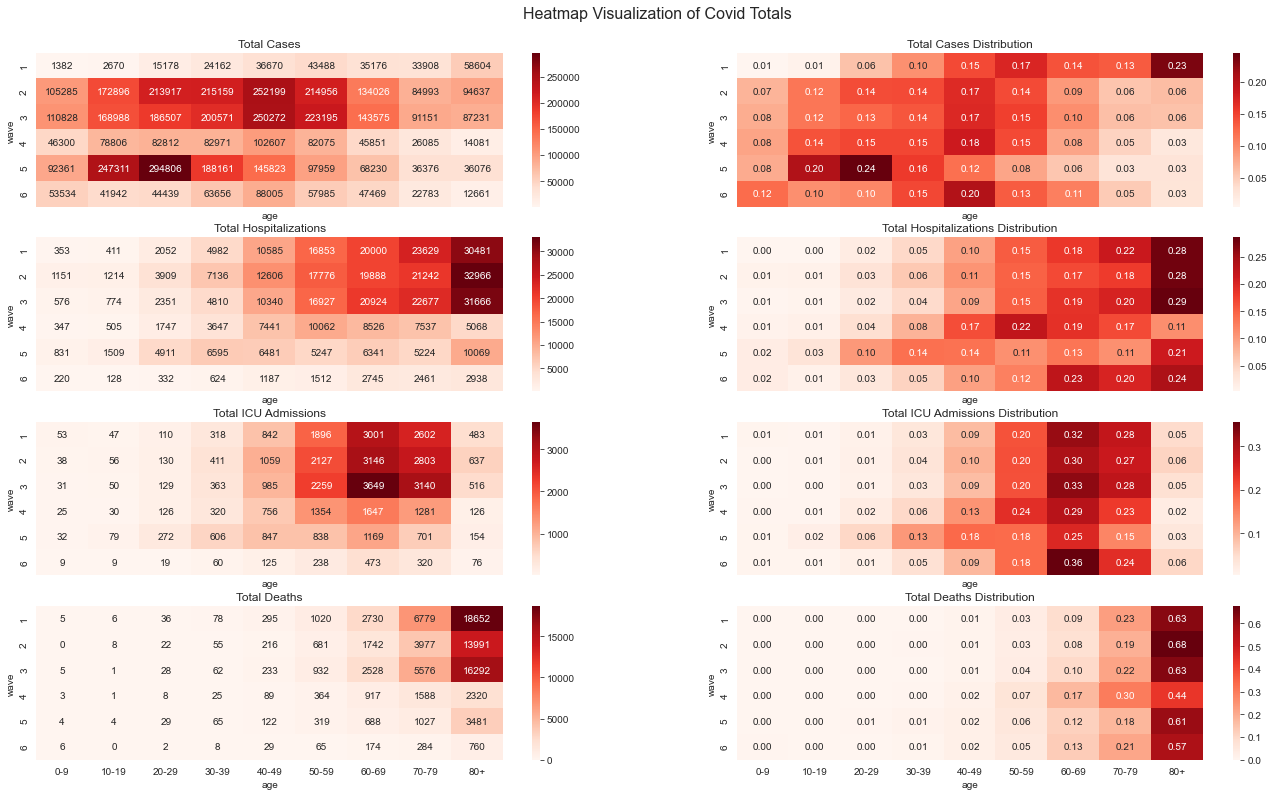

In [94]:
size_unit=np.array([1.77, 1])

# create figure
fig, axes = plt.subplots(4, 2, figsize = 13*size_unit, sharex=True)
fig.suptitle('Heatmap Visualization of Covid Totals', y=0.93)

# plot axes and set titles
sns.heatmap(totals.pivot('wave','age','cases'), cmap='Reds', ax=axes[0,0], annot=True, fmt="d")
axes[0,0].set_title('Total Cases')
sns.heatmap(totals.pivot('wave','age','cases_wave_pct'), cmap='Reds', ax=axes[0,1], annot=True, fmt=".2f")
axes[0,1].set_title('Total Cases Distribution')

sns.heatmap(totals.pivot('wave','age','hospitalizations'), cmap='Reds', ax=axes[1,0], annot=True, fmt="d")
axes[1,0].set_title('Total Hospitalizations')
sns.heatmap(totals.pivot('wave','age','hospitalizations_wave_pct'), cmap='Reds', ax=axes[1,1], annot=True, fmt=".2f")
axes[1,1].set_title('Total Hospitalizations Distribution')

sns.heatmap(totals.pivot('wave','age','icu'), cmap='Reds', ax=axes[2,0], annot=True, fmt="d")
axes[2,0].set_title('Total ICU Admissions')
sns.heatmap(totals.pivot('wave','age','icu_wave_pct'), cmap='Reds', ax=axes[2,1], annot=True, fmt=".2f")
axes[2,1].set_title('Total ICU Admissions Distribution')

sns.heatmap(totals.pivot('wave','age','deaths'), cmap='Reds', ax=axes[3,0], annot=True, fmt="d")
axes[3,0].set_title('Total Deaths')
sns.heatmap(totals.pivot('wave','age','deaths_wave_pct'), cmap='Reds', ax=axes[3,1], annot=True, fmt=".2f")
axes[3,1].set_title('Total Deaths Distribution')

plt.savefig('./fig/totals_heatmap.png', bbox_inches = 'tight')

## 5th Dashboard. Increases

masks for referincing multiindex

In [95]:
idxmask_observation_cases = df_increases.index.get_level_values('observation') == 'cases'
idxmask_wave_notfirst = df_increases.index.get_level_values('wave') != 1
colmask_wave_notone = df_increases.columns != 1
idxmask_wave_first = df_increases.index.get_level_values('wave') == 1
colmask_wave_one = df_increases.columns == 1

In [96]:
df_increases.loc[(idxmask_observation_cases, idxmask_wave_first), :] = np.nan
df_increases.loc[(idxmask_observation_cases, idxmask_wave_notfirst), colmask_wave_one] = np.nan

In [97]:
idxmask_observation_hospitalizations = df_increases.index.get_level_values('observation') == 'hospitalizations'
idxmask_observation_icu = df_increases.index.get_level_values('observation') == 'icu'
idxmask_observation_deaths = df_increases.index.get_level_values('observation') == 'deaths'

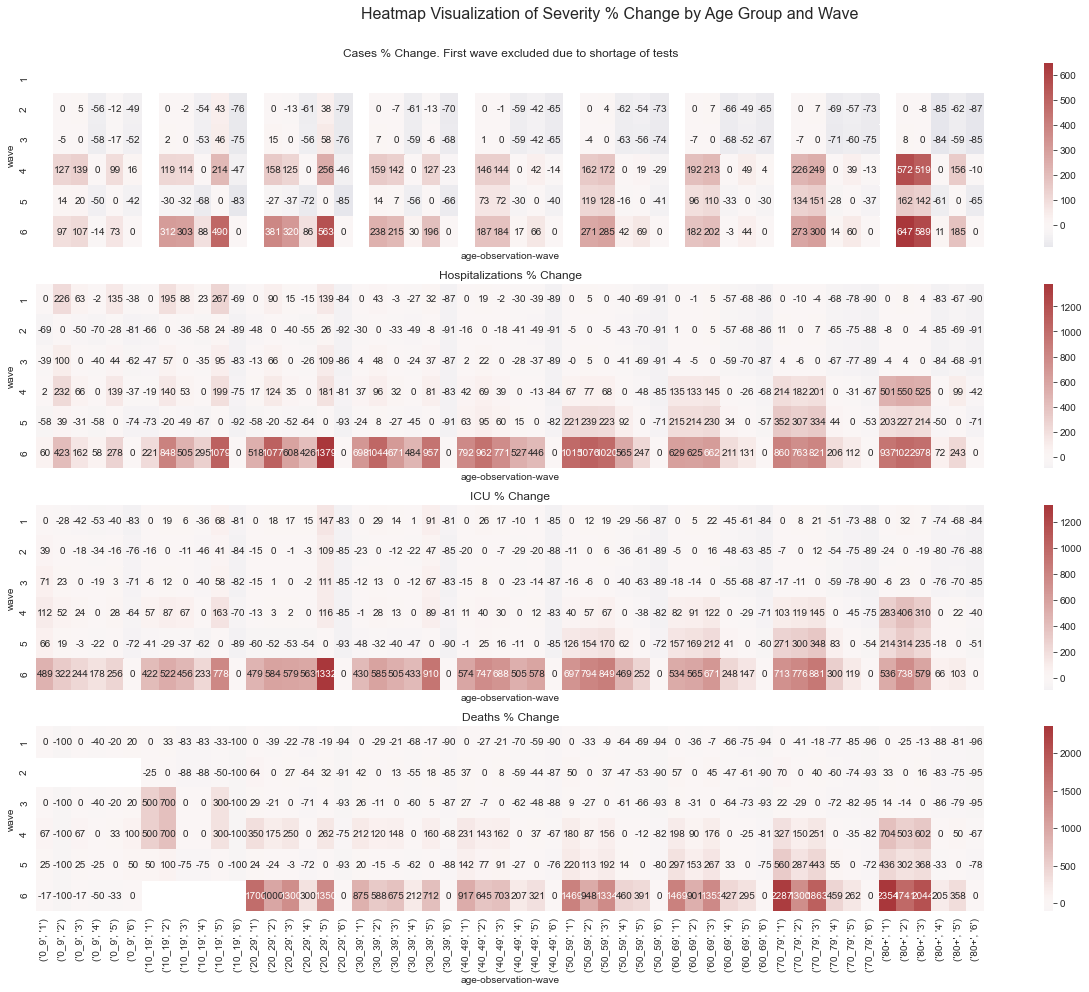

In [98]:
size_unit=np.array([1.77,1.3])

fig, axes = plt.subplots(4, 1, figsize = 12*size_unit, sharex=True)
fig.suptitle('Heatmap Visualization of Severity % Change by Age Group and Wave', y=0.93)

sns.heatmap(df_increases.loc[idxmask_observation_cases].transpose(), center = 0, cmap='vlag', annot=True, fmt = '.0f', ax=axes[0])
axes[0].set_title('Cases % Change. First wave excluded due to shortage of tests')
sns.heatmap(df_increases.loc[idxmask_observation_hospitalizations].transpose(), center = 0, cmap='vlag', annot=True, fmt = '.0f', ax=axes[1])
axes[1].set_title('Hospitalizations % Change')
sns.heatmap(df_increases.loc[idxmask_observation_icu].transpose(), center = 0, cmap='vlag', annot=True, fmt = '.0f', ax=axes[2])
axes[2].set_title('ICU % Change')
sns.heatmap(df_increases.loc[idxmask_observation_deaths].transpose(), center = 0, cmap='vlag', annot=True, fmt = '.0f', ax=axes[3])
axes[3].set_title('Deaths % Change')

for ax in axes.flat:
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels = [w.replace('-', '_', 1) for w in labels]
    labels = [w.replace('_deaths', '') for w in labels]
    labels = [(w.split('-')[0], w.split('-')[-1]) for w in labels]
    ax.set_xticklabels(labels)
    
plt.savefig('./fig/heatmap_pct_change.png', bbox_inches = 'tight')

#### Drafts
----

Deaths 2019

## SERIE TEMPORAL VACUNACION EDAD??
usar requests y un engine de ods para buscar constuir una funcion que construya un dataset con los datos de vacunacion

pd.read_csv('https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Informe_Comunicacion_20210819.ods')

In [ ]:
# waveday variable
covid['waveday'] = covid.groupby(['age','wave'])['date'].rank()